### Chapter 9 - NLTK & Spacy

### NLTK:

In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
paragraph = """Biotechnology is a broad area of biology, involving the use of living systems and organisms to develop or make products. Depending on the tools and applications, it often overlaps with related scientific fields. In the late 20th and early 21st centuries, biotechnology has expanded to include new and diverse sciences, such as genomics, recombinant gene techniques, applied immunology, and development of pharmaceutical therapies and diagnostic tests. The term biotechnology was first used by Karl Ereky in 1919, meaning the production of products from raw materials with the aid of living organisms."""

In [4]:
paragraph

'Biotechnology is a broad area of biology, involving the use of living systems and organisms to develop or make products. Depending on the tools and applications, it often overlaps with related scientific fields. In the late 20th and early 21st centuries, biotechnology has expanded to include new and diverse sciences, such as genomics, recombinant gene techniques, applied immunology, and development of pharmaceutical therapies and diagnostic tests. The term biotechnology was first used by Karl Ereky in 1919, meaning the production of products from raw materials with the aid of living organisms.'

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

sentences = sent_tokenize(paragraph)
sentences

[nltk_data] Downloading package punkt to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Biotechnology is a broad area of biology, involving the use of living systems and organisms to develop or make products.',
 'Depending on the tools and applications, it often overlaps with related scientific fields.',
 'In the late 20th and early 21st centuries, biotechnology has expanded to include new and diverse sciences, such as genomics, recombinant gene techniques, applied immunology, and development of pharmaceutical therapies and diagnostic tests.',
 'The term biotechnology was first used by Karl Ereky in 1919, meaning the production of products from raw materials with the aid of living organisms.']

In [8]:
words = word_tokenize(sentences[0])
words

['Biotechnology',
 'is',
 'a',
 'broad',
 'area',
 'of',
 'biology',
 ',',
 'involving',
 'the',
 'use',
 'of',
 'living',
 'systems',
 'and',
 'organisms',
 'to',
 'develop',
 'or',
 'make',
 'products',
 '.']

In [9]:
from nltk.tokenize import PunktSentenceTokenizer
tokens = word_tokenize(sentences[0])
tags = nltk.pos_tag(tokens)
tags

[('Biotechnology', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('broad', 'JJ'),
 ('area', 'NN'),
 ('of', 'IN'),
 ('biology', 'NN'),
 (',', ','),
 ('involving', 'VBG'),
 ('the', 'DT'),
 ('use', 'NN'),
 ('of', 'IN'),
 ('living', 'VBG'),
 ('systems', 'NNS'),
 ('and', 'CC'),
 ('organisms', 'NNS'),
 ('to', 'TO'),
 ('develop', 'VB'),
 ('or', 'CC'),
 ('make', 'VB'),
 ('products', 'NNS'),
 ('.', '.')]

In [10]:
freqdist = nltk.FreqDist(word_tokenize(paragraph))
freqdist

FreqDist({',': 8, 'and': 6, 'of': 5, 'the': 5, '.': 4, 'living': 2, 'organisms': 2, 'to': 2, 'products': 2, 'with': 2, ...})

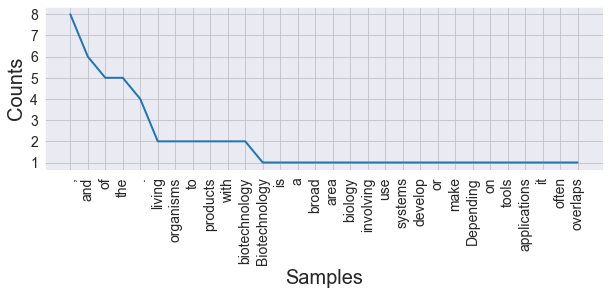

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
plt.xlabel("Samples", fontsize=20)
plt.xticks(fontsize=14)

plt.ylabel("Counts", fontsize=20)
plt.yticks(fontsize=14)

sns.set_style("darkgrid")
freqdist.plot(30,cumulative=False)

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import re

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
def cleaner(text):
    text = text.lower() #Convert to lower case
    text = re.sub("[^a-zA-Z]+", ' ', text) # Only keep text, remove punctuation and numbers
    text_tokens = word_tokenize(text) #Tokenize the words
    tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS] #Remove the stop words
    filtered_sentence = (" ").join(tokens_without_sw) # Join all the words or tokens back to a single string
    return filtered_sentence

In [15]:
clean_paragraph = cleaner(paragraph)
clean_paragraph

'biotechnology broad area biology involving use living systems organisms develop make products depending tools applications often overlaps related scientific fields late th early st centuries biotechnology expanded include new diverse sciences genomics recombinant gene techniques applied immunology development pharmaceutical therapies diagnostic tests term biotechnology first used karl ereky meaning production products raw materials aid living organisms'

In [16]:
freqdist = nltk.FreqDist(word_tokenize(clean_paragraph))
freqdist

FreqDist({'biotechnology': 3, 'living': 2, 'organisms': 2, 'products': 2, 'broad': 1, 'area': 1, 'biology': 1, 'involving': 1, 'use': 1, 'systems': 1, ...})

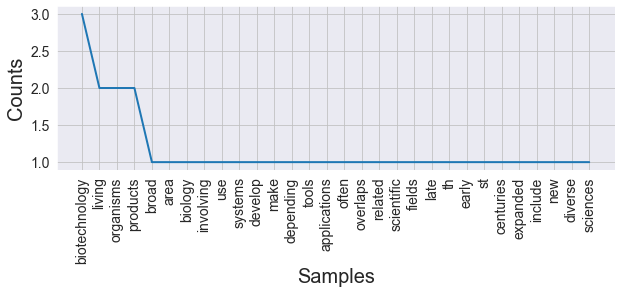

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
plt.xlabel("Samples", fontsize=20)
plt.xticks(fontsize=14)

plt.ylabel("Counts", fontsize=20)
plt.yticks(fontsize=14)

sns.set_style("darkgrid")
freqdist.plot(30,cumulative=False)

### Spacy:

In [20]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
spacy_paragraph = nlp(paragraph)
spacy_paragraph

Biotechnology is a broad area of biology, involving the use of living systems and organisms to develop or make products. Depending on the tools and applications, it often overlaps with related scientific fields. In the late 20th and early 21st centuries, biotechnology has expanded to include new and diverse sciences, such as genomics, recombinant gene techniques, applied immunology, and development of pharmaceutical therapies and diagnostic tests. The term biotechnology was first used by Karl Ereky in 1919, meaning the production of products from raw materials with the aid of living organisms.

In [22]:
print([(X.text, X.label_) for X in spacy_paragraph.ents])

[('the late 20th and early 21st centuries', 'DATE'), ('Karl Ereky', 'PERSON'), ('1919', 'DATE')]


In [23]:
sentences = [x for x in spacy_paragraph.sents]
print(sentences)

[Biotechnology is a broad area of biology, involving the use of living systems and organisms to develop or make products., Depending on the tools and applications, it often overlaps with related scientific fields., In the late 20th and early 21st centuries, biotechnology has expanded to include new and diverse sciences, such as genomics, recombinant gene techniques, applied immunology, and development of pharmaceutical therapies and diagnostic tests., The term biotechnology was first used by Karl Ereky in 1919, meaning the production of products from raw materials with the aid of living organisms.]


In [24]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

In [25]:
displacy.render(nlp(str(sentences[0])), style='dep', jupyter = True, options = {'distance': 120})